In [1]:
import sys
sys.path.append('/home/kfuruglyas/Documents/popularity_versus_similarity/')

In [2]:
import networkx as nx

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pvs import network_creation as nc

from tqdm.notebook import tqdm
from scipy.optimize import curve_fit

In [4]:
Nodes = nc.Nodes(n = 4039, m = 22, beta = 0.4,T = 1.55)

Adding nodes:   0%|          | 0/4039 [00:00<?, ?it/s]/home/kfuruglyas/Documents/popularity_versus_similarity/pvs/network_creation.py:92: RuntimeWarning: divide by zero encountered in log
  dists[key] = np.log(nodes[n]['pos']*nodes[key]['pos']


In [5]:
nodes = Nodes.nodes

In [6]:
for n in nodes.keys():
    if 4039 in nodes[n]["conns"]:
        print(n)

30
172
233
458
517
848
988
1054
1099
1283
1465
1593
1767
2215
2307
2591
2886
3154
3894
3929
3973
4001


In [7]:
nodes[4039]

{'conns': [2307,
  1593,
  233,
  988,
  4001,
  1465,
  3154,
  3894,
  517,
  3929,
  172,
  2886,
  3973,
  30,
  848,
  1283,
  2591,
  2215,
  458,
  1767,
  1099,
  1054],
 'theta': 321.43826348256584,
 'pos': 8.303752415563412}

In [8]:
G = Nodes.to_networkx()

In [9]:
nx.average_clustering(G)

0.6083038151101045

In [10]:
G.number_of_edges(u = 1,)

0

In [11]:
df = Nodes.nodes_df

In [12]:
df['num_of_edges'] = [len(r["conns"]) for i, r in df.iterrows()]

In [13]:
df

,conns,theta,pos,num_of_edges
1,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",89.947956,4.982251,187
2,"[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",41.784665,5.259510,180
3,"[1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",96.472222,5.421696,160
4,"[1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",243.529152,5.536769,167
5,"[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",31.418589,5.626027,158
...,...,...,...,...
4035,"[2083, 1831, 1503, 442, 1769, 1399, 3479, 1408...",205.989350,8.303356,22
4036,"[444, 1800, 3419, 1353, 1346, 871, 1136, 3623,...",57.422218,8.303455,22
4037,"[3084, 2179, 126, 1343, 620, 3847, 2164, 1545,...",164.585017,8.303554,22
4038,"[700, 916, 1268, 623, 148, 1495, 2354, 614, 40...",274.734523,8.303653,22


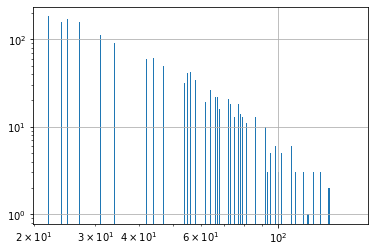

In [69]:
fig, ax = plt.subplots(1,1, facecolor = 'white')

bins = np.logspace(np.log10(df.num_of_edges.min()),np.log10(df.num_of_edges.max()), 100)

df.num_of_edges.hist(bins = bins, ax = ax)

ax.set_yscale('log')
ax.set_xscale('log')

In [105]:
G_fb = nx.read_edgelist("facebook_combined.txt")

In [37]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88605
Average degree:  43.8747


In [9]:
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [10]:
print(nx.average_clustering(G))
print(nx.average_clustering(G_fb))

0.6064805291595774
0.6055467186200876


In [30]:
print(nx.average_shortest_path_length(G))
print(nx.average_shortest_path_length(G_fb))

3.4041571645255195
3.6925068496963913


In [115]:
def power_law(x, gamma, c):
    return c*x**(-gamma)

In [174]:
bins = range(df.num_of_edges.min(),df.num_of_edges.max())

ydata, xdata = np.histogram(df.num_of_edges, bins = bins)
xdata = xdata[:-1]

datas = [(x,y) for x,y in zip(xdata, ydata) if y !=0]
xdata, ydata = np.array([i[0] for i in datas]), np.array([i[1] for i in datas])

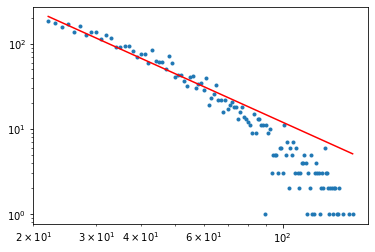

In [175]:

popt, pcov = curve_fit(power_law, xdata, ydata)

plt.plot(xdata, ydata, "." )

plt.plot(xdata, power_law(xdata, *popt), 'r-', )
plt.xscale('log')
plt.yscale('log')


In [176]:
popt

array([1.88961202e+00, 7.20532797e+04])

In [177]:
degrees = np.array(list(dict(G_fb.degree()).values()))

In [178]:
degrees

array([347,  17,  10, ...,   2,   4,   9])

In [179]:
bins = range(degrees.min(),degrees.max())

ydata, xdata = np.histogram(degrees, bins = bins)
xdata = xdata[:-1]

datas = [(x,y) for x,y in zip(xdata, ydata) if y !=0 and x]
xdata, ydata = np.array([i[0] for i in datas]), np.array([i[1] for i in datas])

<ipython-input-115-dfc6b626ea1f>:2: RuntimeWarning: overflow encountered in power
  return c*x**(-gamma)


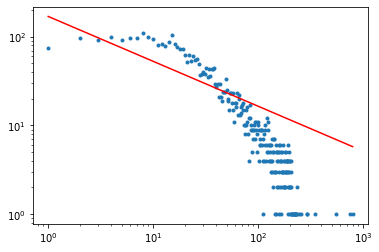

In [180]:

popt, pcov = curve_fit(power_law, xdata, ydata)

plt.plot(xdata, ydata, "." )

plt.plot(xdata, power_law(xdata, *popt), 'r-', )
plt.xscale('log')
plt.yscale('log')


In [181]:
popt

array([  0.50655165, 169.64780068])